In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = pd.read_csv("Resources/ride_data.csv")

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = ride_data_to_load
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


### Inspect the City Data DataFrame
1. for null values
2. driver_count column has int data type
3. how many data point are there for each city type

In [5]:
# Finding Null Values
# using df.count()
non_nulls=[city_data_df["city"].count(),city_data_df["driver_count"].count(),city_data_df["type"].count()]
non_nulls

[120, 120, 120]

In [6]:
city_data_df["driver_count"].isnull().sum()

0

In [7]:
# Finding Null Values
# using df.count()
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# Finding Null Values
# using df.isnull.sum()
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
# Get the number of data points from the Urban cities.
city_data_df.groupby(["type"]).count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


In [12]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

### Inspect Ride Data DataFrame
1. for null values
2. fare and ride_id column data types

In [13]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# finding unique cities from ride_data_df
# ride_data_df.groupby(ride_data_df["city"]).count()
# len(ride_data_df["city"].unique())
list = [ride_data_df["city"].unique()]
len(list[0])

120

In [15]:
# for null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
# for null values
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

### Merge DataFrames

In [17]:
pyber_data_df = pd.merge(ride_data_df,city_data_df, how = "left", on = ["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### 5.3.1 Create DataFrames for Each Type of City
 - The average fare for each type of city on the y-axis
 - The total number of rides for each type city on the x-axis
 - Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city

In [18]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
pyber_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [20]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [21]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


### 5.3.2  Get the Number of Rides for Each City Type

In [22]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(urban_cities_df["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [23]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(suburban_cities_df["city"]).count()["ride_id"]
suburban_ride_count.head()
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

### 5.3.3 Get the Average Fare for Each City Type

In [24]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(urban_cities_df["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [25]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [26]:
urban_cities_df.head(1)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban


### 5.3.4 Get the Average Number of Drivers for Each City Type

In [27]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

In [28]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

### 5.3.5 Create Bubble Charts
  

#### Urban City Bubble Chart

    - The x-axis is the number of rides for each city.
    - The y-axis is the average fare for each city.
    - The size of each marker is the average number of drivers in each city.

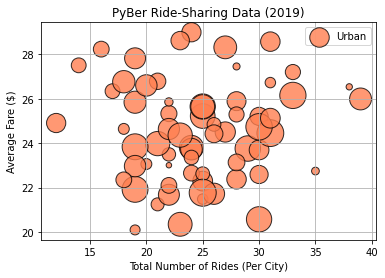

In [29]:
# Build the scatter plots for urban cities.
x = urban_ride_count
y = urban_avg_fare
plt.scatter(x,y,s=10*urban_driver_count,c = 'coral',edgecolor='k',linewidths=1,alpha=0.8,label='Urban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

#### Create the Suburban Cities Bubble Chart

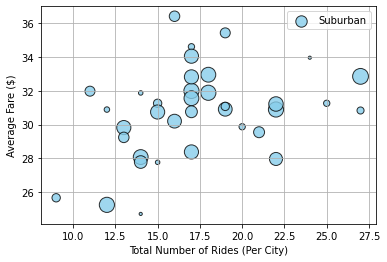

In [67]:
# Build the scatter plots for suburban cities.
x = suburban_ride_count
y = suburban_avg_fare
plt.scatter(x,y,s=10*suburban_driver_count,color= 'skyblue',alpha=0.8,edgecolor='k',label='Suburban',linewidths=1)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

#### Create the Rural Cities Bubble Chart

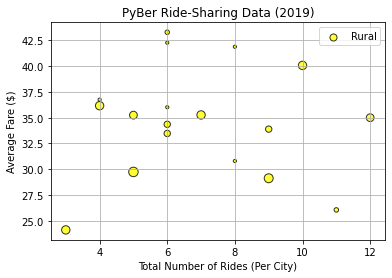

In [69]:
# Build the scatter plots for rural cities.
x=rural_ride_count
y=rural_avg_fare
plt.scatter(x,y,s=rural_driver_count*10,color="yellow",alpha=0.8,edgecolor="k",linewidths=1,label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
plt.legend()

### 5.3.6 Create a Bubble Chart for All Cities

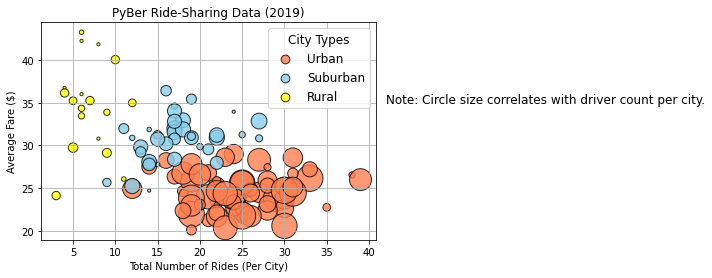

In [78]:
# Add the scatter charts for each type of city.
# Build the scatter plots for urban cities.
x = urban_ride_count
y = urban_avg_fare
plt.scatter(x,y,s=10*urban_driver_count,c = 'coral',edgecolor='k',linewidths=1,alpha=0.8,label='Urban')


# Build the scatter plots for suburban cities.
x = suburban_ride_count
y = suburban_avg_fare
plt.scatter(x,y,s=10*suburban_driver_count,color= 'skyblue',alpha=0.8,edgecolor='k',label='Suburban',linewidths=1)

# Build the scatter plots for rural cities.
x=rural_ride_count
y=rural_avg_fare
plt.scatter(x,y,s=rural_driver_count*10,color="yellow",alpha=0.8,edgecolor="k",linewidths=1,label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Analysis/Fig1.png")

## Calculate Summary Statistics 
### 5.4.1 Summary Statistics for Number of Rides by City Type

In [79]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [81]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [82]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [80]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [83]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [84]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

#### Pandas mean(), median(), and mode() Methods

In [85]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [86]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [87]:
suburban_ride_count.mode()

0    17
dtype: int64

#### NumPy mean() and median() Functions and SciPy mode() Function

In [90]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [95]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count}")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the urban ride count is {median_urban_ride_count}")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62121212121212
The median for the urban ride count is 24.0
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [97]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6]), count=array([5]))

### 5.4.2 Summary Statistics for the Fare by City Type

In [101]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [102]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97.
The mean fare price for rural trips is $34.62.


### 5.4.3 Summary Statistics for the Number of Drivers by City Type

In [118]:
# Get the driver count data from the urban cities.
urban_driver_count = urban_cities_df["driver_count"]
suburban_driver_count = suburban_cities_df["driver_count"]
rural_driver_count = rural_cities_df["driver_count"]

print(f"mean urban_driver_count: {np.mean(urban_driver_count)}")
print(f"median urban_driver_count: {np.median(urban_driver_count)}")
print(f"mode urban_driver_count: {sts.mode(urban_driver_count)}\n")

print(f"mean suburban_driver_count: {np.mean(suburban_driver_count)}")
print(f"median suburban_driver_count: {np.median(suburban_driver_count)}")
print(f"mode suburban_driver_count: {sts.mode(suburban_driver_count)}\n")

print(f"mean rural_driver_count: {np.mean(rural_driver_count)}")
print(f"median rural_driver_count: {np.median(rural_driver_count)}")
print(f"mode rural_driver_count: {sts.mode(rural_driver_count)}")

mean urban_driver_count: 36.67815384615385
median urban_driver_count: 37.0
mode urban_driver_count: ModeResult(mode=array([39]), count=array([86]))

mean suburban_driver_count: 13.712
median suburban_driver_count: 16.0
mode suburban_driver_count: ModeResult(mode=array([20]), count=array([79]))

mean rural_driver_count: 4.296
median rural_driver_count: 4.0
mode rural_driver_count: ModeResult(mode=array([1]), count=array([32]))


### 5.4.4 Create Box-and-Whisker Plots
#### Box-and-Whisker Plots for Ride Count Data

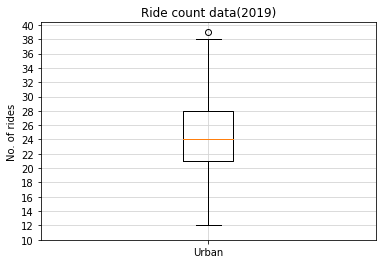

In [134]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels=["Urban"]
fig,ax = plt.subplots(figsize=(6,4))
ax.boxplot(urban_ride_count, labels = x_labels) 
# add the title, y_axis label and grid
ax.set_ylabel("No. of rides")
ax.set_title("Ride count data(2019)")
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid(color="lightgray")
plt.show()

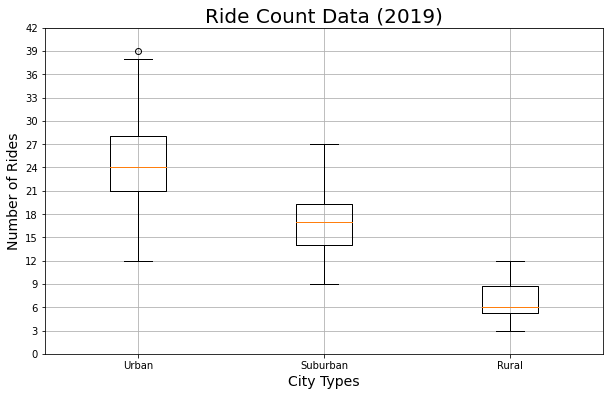

In [139]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [ urban_ride_count,suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [146]:
# Get the city that matches 39.
urban_cities_df.groupby(["city"]).count()["ride_id"]

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [160]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


Summary Statistics


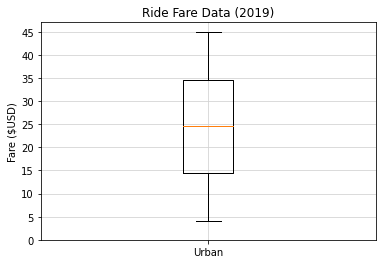

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [178]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig,ax = plt.subplots()
ax.boxplot(urban_fares,labels = x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,49,step=5.0))
ax.grid(color = "lightgray")
print("Summary Statistics")
plt.show()
urban_fares.describe()

### SKILL DRILL
Create a box-and-whisker plot that has all three city types' driver count data in one box-and-whisker plot that looks similar to the following image. Save this combined box-and-whisker plot as Fig4.png in your "analysis" folder.

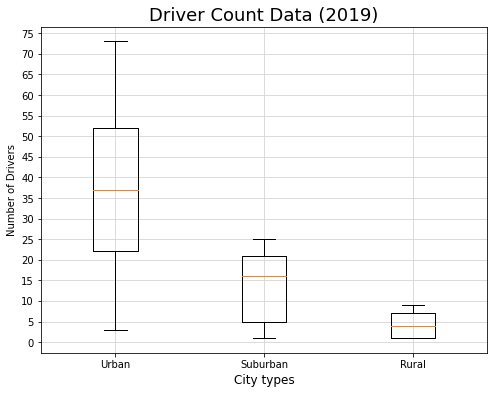

Summary Statistics Urban Driver Count


<Figure size 432x288 with 0 Axes>

In [206]:
x = ["Urban", "Suburban","Rural"]
fig, ax = plt.subplots(figsize = (8,6))
driver_count_df = [urban_driver_count,suburban_driver_count,rural_driver_count]
ax.boxplot(driver_count_df,labels = x)
ax.set_ylabel("Number of Drivers")
ax.set_xlabel("City types",fontsize = 12)
ax.set_title("Driver Count Data (2019)",fontsize = 18)
ax.set_yticks(np.arange(0,80,step=5.0))
ax.grid(color = "lightgray")
plt.show()
print("Summary Statistics Urban Driver Count")
urban_driver_count.describe()

plt.savefig("analysis/Fig4.png")

#### Box-and-Whisker Plots for Driver Count Data

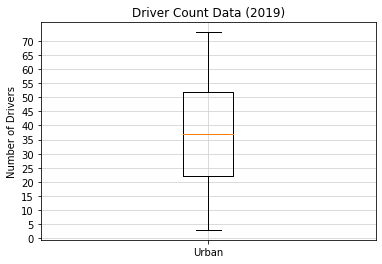

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [188]:
# Create the box-and-whisker plot for the urban driver count data.
x_label = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_driver_count,labels = x_label)
ax.set_ylabel("Number of Drivers")
ax.set_title("Driver Count Data (2019)")
ax.set_yticks(np.arange(0,75,step=5.0))
ax.grid(c="lightgray")
plt.show()
print("Summary Statistics")
urban_driver_count.describe()

### 5.5.1 Get the Percentage of Fares for Each City Type

In [218]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [220]:
# Get the sum of all the fares.
sum_all_fares = sum_fares_by_type.sum()
sum_all_fares

63538.6400000001

In [231]:
# Calculate the percentage of fare for each city type.
percentage_urban_fare = urban_fares.sum()/sum_all_fares *100
print(percentage_urban_fare)
percentage_suburban_fare = suburban_fares.sum()/sum_all_fares*100
print(percentage_suburban_fare)
percentage_rural_fare = rural_fares.sum()/sum_all_fares *100
print(percentage_rural_fare)

62.72463496228428
30.46387206273217
6.8114929749834


In [232]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

### 5.5.2 Pie Chart for the Percentage of Fares by City Type

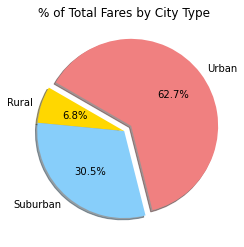

In [236]:
# Build the percentage of fares by city type pie chart.

plt.pie(type_percents,labels = ["Rural","Suburban","Urban"],
       colors = ["gold","lightskyblue","lightcoral"], explode = [0,0,0.1], autopct = '%1.1f%%', shadow = True, startangle = 150)
plt.title("% of Total Fares by City Type")
plt.show()

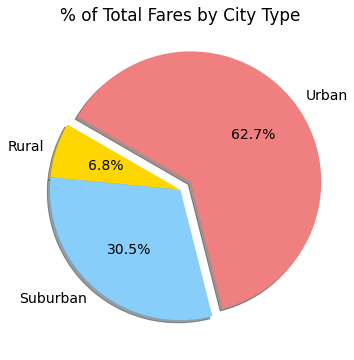

In [238]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

### 5.6.1 Calculate Ride Percentages

In [248]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

### 5.6.2 Pie Chart for Percentage of Rides by City Type

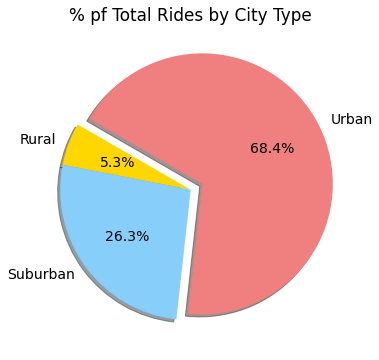

In [249]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% pf Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

### 5.7.1 Calculate Driver Percentages

In [253]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100* city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

### 5.7.2 Pie Chart for the Percentage of Drivers for Each City Type

In [254]:
# Build percentage of rides by city type pie chart.

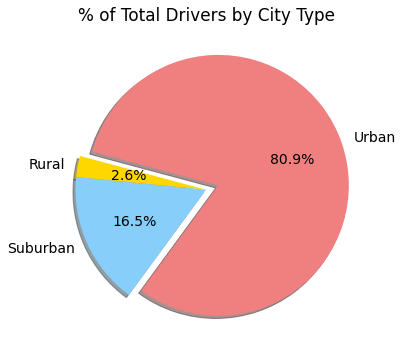

In [255]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()